# ARBOL DE DECISIÓN
En este modelo nuestra variable objetivo es es predecir el género de una canción con respecto a los valores que esten más relacionados al genero.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree # Importa el modelo de aprendisaje supervisado
from sklearn.model_selection import train_test_split #divide los datos en unsubconjunto de entrenamiento y pruebas
from sklearn.metrics import confusion_matrix #Ayuda a obtener la matriz de confusión

import seaborn as sns #crea visualizaciones de datos en graficos
import matplotlib.pyplot as plt #ayuda acrear graficos de barras, de lineas o deispersion
%matplotlib inline

In [ ]:
#Carga del dataset deescargado de https://www.kaggle.com/code/acr1209/eda-spotify-tracks
df = pd.read_csv('spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6.0,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11.0,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7.0,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21886 entries, 0 to 21885
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  21886 non-null  object 
 1   track_name                21881 non-null  object 
 2   track_artist              21881 non-null  object 
 3   track_popularity          21886 non-null  int64  
 4   track_album_id            21886 non-null  object 
 5   track_album_name          21881 non-null  object 
 6   track_album_release_date  21886 non-null  object 
 7   playlist_name             21886 non-null  object 
 8   playlist_id               21885 non-null  object 
 9   playlist_genre            21885 non-null  object 
 10  playlist_subgenre         21885 non-null  object 
 11  danceability              21885 non-null  float64
 12  energy                    21885 non-null  float64
 13  key                       21885 non-null  float64
 14  loudne

Visualizamos todas las columnas del dataset y las analizamos, tomando en cuenta que características nos ayudaran a realizar una predicción del genero de cada canción, en este caso sólo haremos uso de las siguientes columnas:


*   'danceability': Este indica que tan
bailable puede ser la canción en un rango de 0 a 1, donde 0 es menos bailable y 1 muy baiblable.
*   'energy': Este indica el nivel de energia de la canción, es decir si es muy activa o relajada, sus valores van de 0 a 1, donde 0 es una canción relajada y 1 una canción intensa.
*   'valence': Esta indica que tan alegre o triste puede resultar la canción, con un rango de 0 a 1, donde 0 representa emociones negativas(tristeza, enojo) y 1 representa emociones positivas(alegria, emoción).




In [ ]:
# Reducimos el data set con respecto a las columnas que vamos a utilizar
columnas = ['track_id','track_artist','track_popularity','track_album_id','track_album_name','track_album_release_date','playlist_name', \
            'playlist_id','playlist_subgenre','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','tempo', 'duration_ms' ]
df_spotify = df.drop(columns=columnas)
df_spotify.to_csv('spotify_songs_reduced.csv', index=False)

In [ ]:
# DF con modificaciones
df_spotify = pd.read_csv('spotify_songs_reduced.csv')
df_spotify.head()

,track_name,playlist_genre,danceability,energy,valence
0,I Don't Care (with Justin Bieber) - Loud Luxur...,pop,0.748,0.916,0.518
1,Memories - Dillon Francis Remix,pop,0.726,0.815,0.693
2,All the Time - Don Diablo Remix,pop,0.675,0.931,0.613
3,Call You Mine - Keanu Silva Remix,pop,0.718,0.930,0.277
4,Someone You Loved - Future Humans Remix,pop,0.650,0.833,0.725


In [ ]:
#Conteo de generos
df_spotify['playlist_genre'].value_counts()

rap      5746
pop      5507
latin    5155
rock     4951
r&b       526
Name: playlist_genre, dtype: int64

Tomando en cuenta que no será tan preciso nuestro árbol con respecto a los distintos generos que se encuentran, vamos a reducir las etiquetas del genero, conservando 'rap', 'pop' y 'rock'.

DATASET CON 3 ETIQUETAS DE GENERO

In [ ]:
#Disminuyendo los generos del DF para tener tener 3 etiquetas
# Lista de géneros que se conservarán
generos_deseados = ['pop', 'rap', 'rock']

# Filtrar los registros
df_filtrado = df_spotify[df_spotify['playlist_genre'].isin(generos_deseados)]

# Guardar el DataFrame filtrado en un nuevo archivo CSV
df_filtrado.to_csv('spotify_reduced.csv', index=False)

Comenzamos a trabajar con el DF final para realizar nuestro árbol

---



---



---



In [ ]:
df_final = pd.read_csv('spotify_reduced.csv')
df_final.head()

,track_name,playlist_genre,danceability,energy,valence
0,I Don't Care (with Justin Bieber) - Loud Luxur...,pop,0.748,0.916,0.518
1,Memories - Dillon Francis Remix,pop,0.726,0.815,0.693
2,All the Time - Don Diablo Remix,pop,0.675,0.931,0.613
3,Call You Mine - Keanu Silva Remix,pop,0.718,0.930,0.277
4,Someone You Loved - Future Humans Remix,pop,0.650,0.833,0.725


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16204 entries, 0 to 16203
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   track_name      16201 non-null  object 
 1   playlist_genre  16204 non-null  object 
 2   danceability    16204 non-null  float64
 3   energy          16204 non-null  float64
 4   valence         16204 non-null  float64
dtypes: float64(3), object(2)
memory usage: 633.1+ KB


In [ ]:
df_final.describe()

,danceability,energy,valence
count,16204.000000,16204.000000,16204.000000
mean,0.631049,0.692896,0.514414
std,0.156913,0.181471,0.225199
min,0.000000,0.008140,0.000000
25%,0.525000,0.576000,0.344000
50%,0.642000,0.714000,0.515000
75%,0.747000,0.835000,0.687000
max,0.979000,0.999000,0.991000


Al visualizar la descripción de los datos del DF visualizamos que los valores estan dentro del mismo rango, por lo que no hace falta normalizarlos.

In [ ]:
# Hacemos conteo de los registros que estamos trabajando
print(len(df_final))

16204


In [ ]:
# Conteo de generos
df_final['playlist_genre'].value_counts()

rap     5746
pop     5507
rock    4951
Name: playlist_genre, dtype: int64

Hacemos una visualización gráfica del comportamiento de nuestros datos a trabajar con respecto a cada género

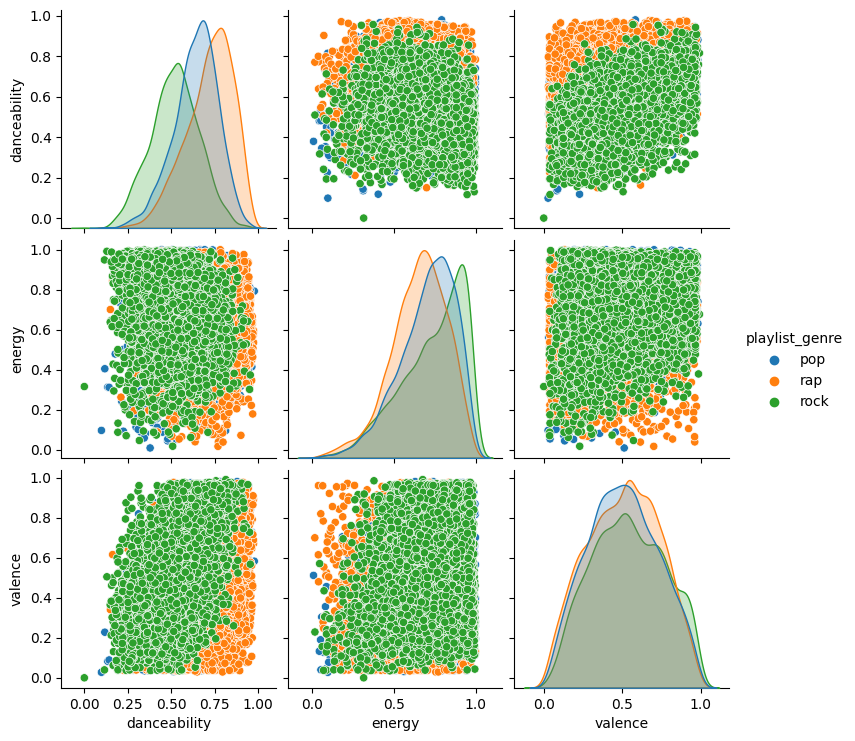

In [ ]:
# Relación de los generos con cada valor
sns.pairplot(df_final, hue='playlist_genre', vars=['danceability', 'energy', 'valence'])
plt.show()

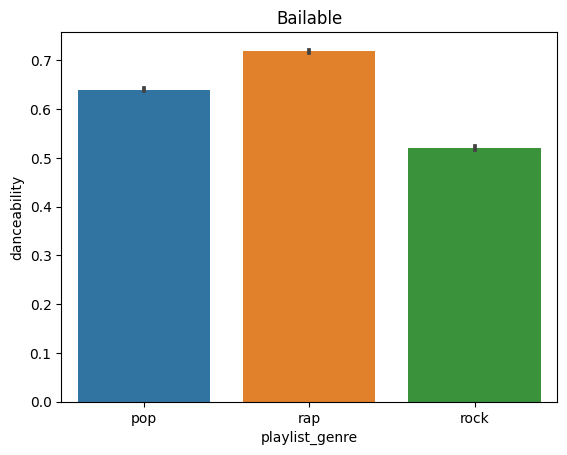

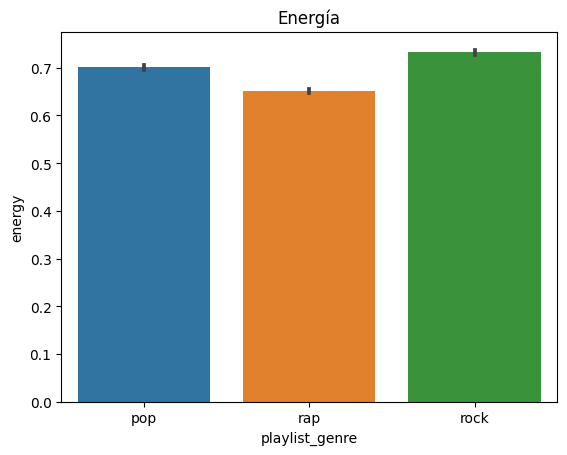

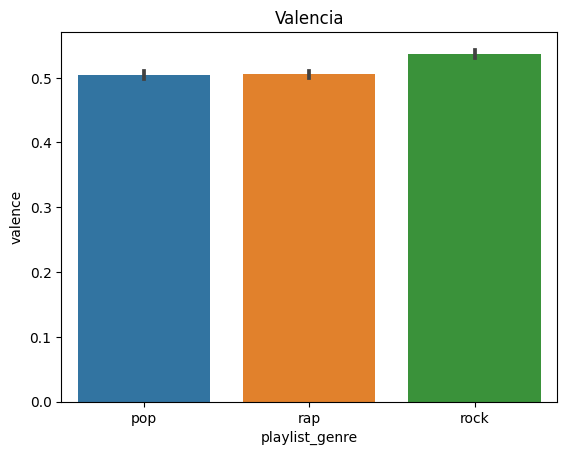

In [ ]:
# Visualizamos de mejor manera el comportamiento de los géneros en un gráfico de barras
sns.barplot(x='playlist_genre', y='danceability', data=df_final)
plt.title('Bailable')
plt.show()

sns.barplot(x='playlist_genre', y='energy', data=df_final)
plt.title('Energía')
plt.show()

sns.barplot(x='playlist_genre', y='valence', data=df_final)
plt.title('Valencia')
plt.show()

De estos graficos podemos hacer un análisis rápido y deducir que:

*   El género más bailable es el POP
*   El género más enérgico es el RAP
*   El género más valencia(Alegre) es RAP


*   El género menos bailable es el ROCK
*   El género menos enérgico es el ROCK
*   El género con menos valencia(Triste) es ROCK






MODELO (ARBOL DE DECICION)


In [ ]:
# Arbol de decición
y = df_final['playlist_genre']
X = df_final[['danceability', 'energy', 'valence']]

Determinamos las variables 'X' y 'y', asignandole a X los datos con los que se realizarán las predicciones de las etiquetas de género 'y'

In [ ]:
print("Número de filas en X:", len(X))
print("Número de filas en y:", len(y))

Número de filas en X: 16204
Número de filas en y: 16204


# ENTRENAMIENTO DEL ARBOL

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
split_data = train_test_split(X, y, test_size=0.3, random_state=2500)
X_train, X_test, y_train, y_test = split_data

Tomamos de nuestro conjunto de datos 'X' y 'y', que representan las carcterísticas y etiquetas, e indicamos que el 30% de los datos se utilizarán para prueba, y el 70% como conjunto de entrenamiento y establecemos una semilla de 2500 para que nos génere números aleatorios.

Los conjuntos de datos divididos se asignan a cuatro variables diferentes:
*   X_train contiene las características del
conjunto de entrenamiento.
*   X_test contiene las características del conjunto de prueba.
*   y_train contiene las etiquetas del conjunto de entrenamiento
*   y_test contiene las etiquetas del conjunto de prueba.

In [ ]:
# Decision Tree
model = DecisionTreeClassifier(max_depth=3, random_state=2500)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2500)

Asignamos los siguientes paámetros a nuestro árbol:


*   Limitamos la profundidad del árbol a 3 niveles, para tener una mejor visualización de los resultados.
*   Establecimos una semilla de 2500 para que el proceso sea reproducible.

Después entrenamos el modelo utilizando los conjuntos de entrenamiento previamente realizados 'X_train' y 'y_train', el modelo se basa en estos datos para aprender la relación que existe entre las características y las etiquetas, para sí contruir el árbol de decisión en base a predicciones.



In [ ]:
# Visualizamos cuantos datos se estan tomando para realizar las predicciones
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f"son {X_train.shape[0]} datos de entrenamiento y {X_test.shape[0]} datos de prueba")

son 11342 datos de entrenamiento y 4862 datos de prueba


# VISUALIZACION DEL MODELO

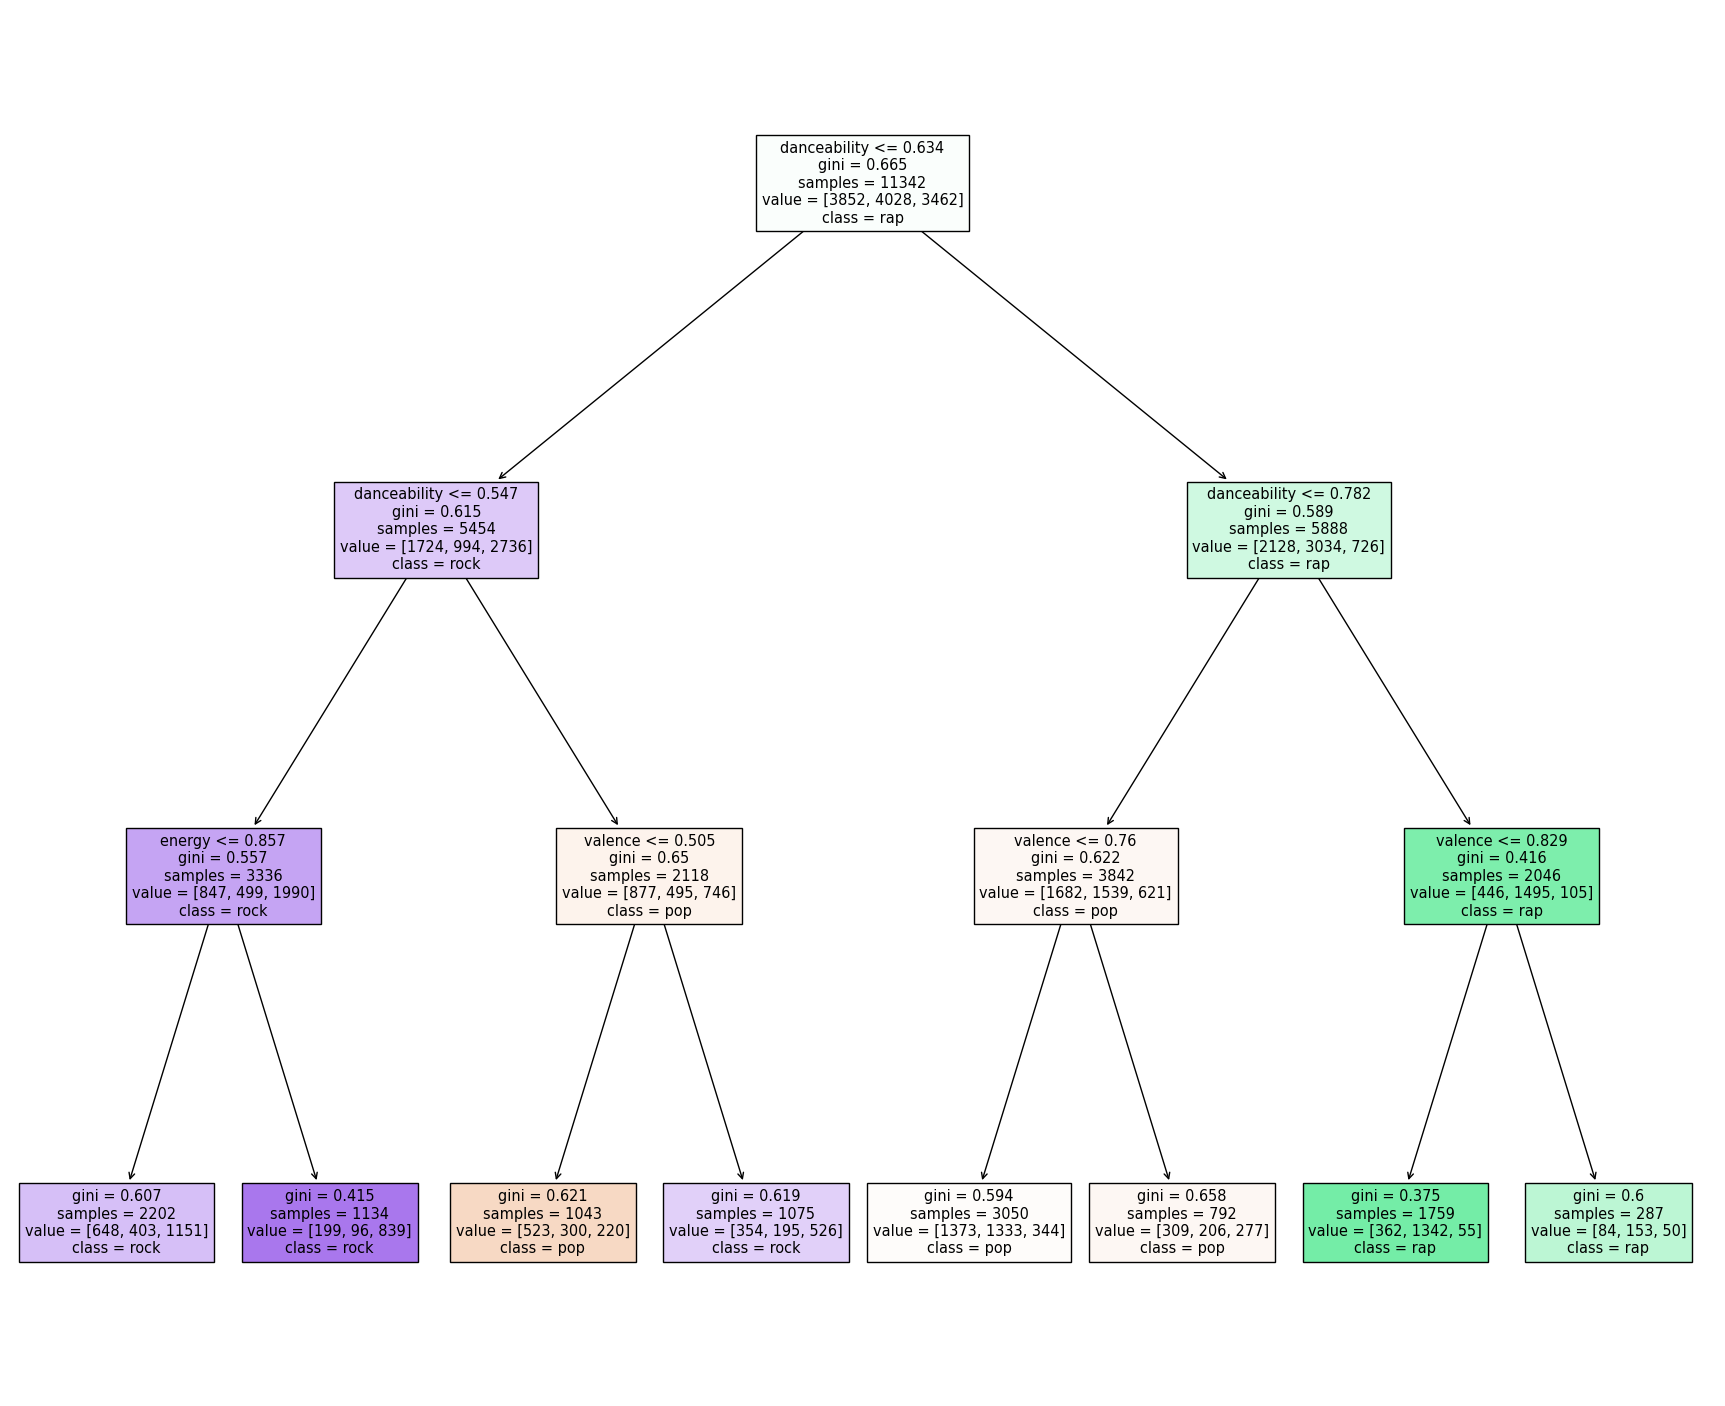

In [ ]:
plt.figure(figsize=(22, 18))
plot_tree(model, feature_names=['danceability', 'energy', 'valence'], class_names=model.classes_, filled=True)
plt.show()

Analisis del modelo:
Como primer valor se tiene la característica a evaluar en un cierto rango, después se tiene **gini**, es decir, la impureza o calidad de las divisiones que se realizan, **samples** nos indica el número de registros que se toman para evaluar el nodo, **value** nos indica la cantidad de registros que se tienen con respecto a cada género musical y por último **class** quien nos indicará a que genero pertenecen esos registros.


En el nodo raíz se evalua con una calidad(gini) de 0.665, tomando en cuenta 11342 ejemplos, de los cuales 3852 pertenecen a POP, 4028 pertenecen a RAP y 3462 pertenecen a ROCK y la condición a cumlir es: si la cancion es 'danceability'(bailable), si su valor es menor o igual a 0.634 se va a clasificar como RAP, después se divide en 2 nodos el árbol, del lado derecho se sigue evaluando 'danceability', si se tiene un valor menor o igual a 0.782 entonces se sigue clasificando como RAP, de este se desglozan 2 nodos más donde se evalua su 'valence', si este tiene un valor igual o menor de 0.829 entonces se clasifica como RAP de lo contrario será POP teniendo una valencia igual o menor a 0.76.

Del nodo izquierdo que surge después de la primera clasificación se sigue evaluando 'danceability' si tiene un valor igual o menor a 0.547 entonces es ROCK, surgen dos nodos en uno se evalua 'energy' si tiene un valor menor o igual a 0.857 entonces es ROCK, pero si se tiene una 'valence' donde es igual o menor 0.505 entonces el genero es POP

# EVALUACION DEL MODELO

In [ ]:
# Evaluación de la exactitus del modelo
treclass = DecisionTreeClassifier(max_depth=3, random_state=2500)
treclass.fit(X_train, y_train)
score = treclass.score(X_train, y_train)
score_por = score *100
print(f'{score_por} %')

55.660377358490564 %


Al evaluar la exactitu del modelo, observamos que nos da un 50% de acertividad confrme a las predicciones, de esta evaluación podemos concluir que el modelo solo esta haciendo bien las predicciones de casi la mitad de los registros, y en la otra mitad esta teniendo inconsistencias, debido a que los valores de los géneros son muy similares y no existe un rango diferenciador de estos, por lo tanto el modelo no logra hacer una predicción precisa de los géneros musicales.

In [ ]:
predicciones = model.predict(X_test)
predicciones

array(['pop', 'rap', 'pop', ..., 'rock', 'pop', 'rock'], dtype=object)

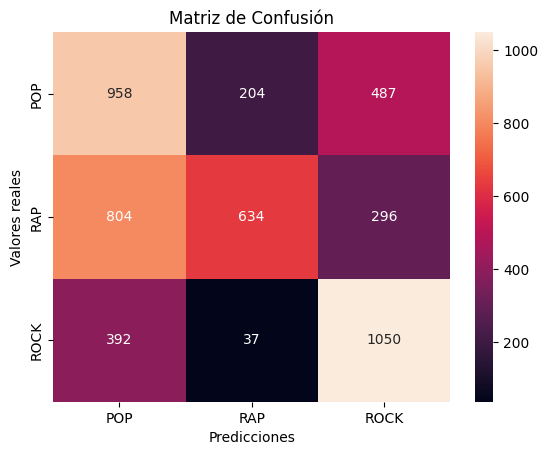

In [ ]:
# Matriz de confusión
confusion = confusion_matrix(y_test, predicciones)

sns.heatmap(confusion, annot=True, fmt='d', xticklabels=['POP', 'RAP', 'ROCK'], yticklabels=['POP', 'RAP', 'ROCK'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

Con esta matriz de confusión podemos observar el rendimiento del modelo en funcion de las predicciones y los valores reales.